<a href="https://colab.research.google.com/github/03dipak/Linear-Regression-Practice/blob/master/LinearRegressionAssignmentQuestions-1543832506191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT

###  This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

#### Note: Please run your code step by step as provided in the sheet or else you may face challenges with the code.

### Import the dataset.

In [0]:
import pandas as pd

In [3]:
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


### Check the shape of the dataset.

In [8]:
def lr():
    return car.shape 
lr()

(156, 16)

### Check the descriptive stats of the dataset.

In [9]:
def lr():
    return car.describe()
lr()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Q 1. Write a code to understand the total count and percentage of missing values.

In [10]:
def lr():
    # Count total missing and sort it 
    # Calucalte percent 
    # concatenate total and percent 
    # print missing data assigning a varibale
    # return using your created variable
    total = car.isnull().count()
    percent = car.isnull().sum()/car.isnull().count()*100
    miss = pd.concat([total,percent],axis=1,keys=['total','percent']) 
    #print(car.isnull().sum())
    #print(car.isnull().count())
    #print(car['Sales_in_thousands'].value_counts())
    return miss
lr()

,total,percent
Manufacturer,156,0.000000
Model,156,0.000000
Sales_in_thousands,156,3.205128
_year_resale_value,156,0.000000
Vehicle_type,156,0.000000
Price_in_thousands,156,0.000000
Engine_size,156,0.000000
Horsepower,156,0.000000
Wheelbase,156,0.000000
Width,156,0.000000


### Q 2. Impute the missing value using "median" groupby Manufacturer. 

In [4]:

def lr(): 
    car['Sales_in_thousands'].fillna(value=(car.groupby('Manufacturer')['Sales_in_thousands'].transform('median')),inplace=True)
    # your code here to impute missing value using median and groupby
    return
lr()
#print(car.groupby('Manufacturer').median()[['Sales_in_thousands']])
print (car.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


### Q 3. Create a dummy variable for "Vehicle_type"  and  drop the original variable.

In [5]:
car_dummy =pd.DataFrame()                                                           # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
    return dummies
    # your code to create dummies
    return #your created variable
car_dummy = lr(car)
print(car_dummy.columns)
print(car.columns)

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '_year_resale_value',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor', 'Vehicle_type_Passenger'],
      dtype='object')
Index(['Manufacturer', 'Model', 'Sales_in_thousands', '_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')


### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['Manufacturer', 'Model', 'Latest_Launch'] ```

In [6]:
def lr(car_dummy):
    # your code to drop the useless variables
    #car_dummy.drop(columns=['Manufacturer', 'Model', 'Latest_Launch'])
    return car_dummy.drop(columns=['Manufacturer', 'Model', 'Latest_Launch'])# your created variable
car_dummy = lr(car_dummy)
print (car_dummy)

     Sales_in_thousands  ...  Vehicle_type_Passenger
0                16.919  ...                       1
1                39.384  ...                       1
2                14.114  ...                       1
3                 8.588  ...                       1
4                20.397  ...                       1
..                  ...  ...                     ...
151               3.545  ...                       1
152              15.245  ...                       1
153              17.531  ...                       1
154               3.493  ...                       1
155              18.969  ...                       1

[156 rows x 13 columns]


### Check for outliers using Box Plot

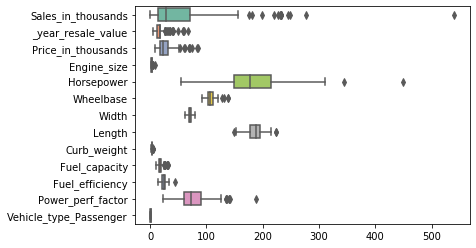

In [0]:
def lr():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
lr()

### Q 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [14]:
def lr(car_dummy):
    import pandas as pd
    # Calculate Q1 value using quantile(0.05)
    # Calculate Q3 value using quantile value (0.95)
    # Calculate Inter Quartile Range
    # create a variable and check for outliers and drop them off
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_dif = Q3 - Q1
    out = car_dummy[~(( car_dummy < (Q1 - Q_dif))) | ((car_dummy > (Q3 + Q_dif) ))]
    return out# your created variable
car_dummy = lr(car_dummy)
print (car_dummy)

     Sales_in_thousands  ...  Vehicle_type_Passenger
0                16.919  ...                       1
1                39.384  ...                       1
2                14.114  ...                       1
3                 8.588  ...                       1
4                20.397  ...                       1
..                  ...  ...                     ...
151               3.545  ...                       1
152              15.245  ...                       1
153              17.531  ...                       1
154               3.493  ...                       1
155              18.969  ...                       1

[156 rows x 13 columns]


### Q 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [7]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    # code to scale the variables
    scalar = StandardScaler().fit(car_modify)
    #print(scalar)
    st = scalar.transform(car_modify)
    #print(st)
    # code to transform the variables and standardize them
    return st# your created variable
std = lr(car_modify)
print(std[1])

[ 0.18033873  0.07005147  0.13358557  0.69094938  0.08045672 -0.24703626
  0.41500948  0.21770203 -0.19402264  0.27500229  0.56959669  0.58722022]


### Q 7. Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger'] ```

In [0]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def lr(std):
    cars = pd.DataFrame(std)
    cars.columns = columns
    #cars = 'null'
    # create a dataframe cars for the numpy array
    # assign the column headers with the columns mentioned above
    return cars
cars = lr(std)

### Q 8: Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']```

In [10]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    # assign values of fature_cols to X
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

     Price_in_thousands  Engine_size  ...  Fuel_efficiency  Vehicle_type_Passenger
0             -0.413822    -1.210889  ...         0.982151                 0.58722
1              0.070051     0.133586  ...         0.275002                 0.58722
2              0.112127     0.133586  ...         0.510719                 0.58722
3              1.023772     0.421687  ...        -0.432146                 0.58722
4             -0.239207    -1.210889  ...         0.746435                 0.58722
..                  ...          ...  ...              ...                     ...
151           -0.210455    -1.114855  ...         0.275002                 0.58722
152            0.006938    -0.634685  ...         0.275002                 0.58722
153            0.098102    -0.634685  ...         0.275002                 0.58722
154            1.269215    -0.730719  ...        -0.196430                 0.58722
155            0.603013    -0.154516  ...         0.039286                 0.58722

[15

### Check for the type and shape of X.

In [11]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(156, 5)


### Q 9. Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [12]:
y = pd.DataFrame()
def lr(car_dummy):
    # assign the dependent variable to y dataframe
    y = car_dummy['Sales_in_thousands']
    return y#your dataframe
y = lr(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y. 

In [13]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(156,)


<a id=section403></a>

### Q 10. Split the value of X and y into train and test datasets.

In [0]:
from sklearn.model_selection import train_test_split
def lr(X,y):

    return train_test_split(X, y, test_size=0.30, random_state=1) # train test split using train test split of 70:30 and random state=1
X_train, X_test, y_train, y_test = lr(X,y)

### Check the shape of  X and y of train dataset.

In [20]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(109, 5)
(109,)


### Check the shape of X and y of test dataset.

In [21]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(47, 5)
(47,)


<a id=section404></a>

### Q 11. Instantiate Linear regression model using scikit-learn

In [0]:
from sklearn.linear_model import LinearRegression
def lr():
    #initiate the linear regression model to new variable linreg
    return linreg
linreg = lr()

### Q12. Fit the linear model on X_train and y_train.

In [0]:
def lr():
    # fit the X_train and y_train
    # We don't expect any return from your side.
lr()

<a id=section405></a>

### Q 13. Interpret the Model Coefficients.

In [0]:
def lr():
    # print the linreg.intercet
    # print the linreg.coefficient
lr()

### Q.14 Zip the features to pair the feature names with the coefficients.

In [0]:
def lr():
    # insert Intercept variable with the feature_cols
    # make a list using linreg.coef
    # insert the intercept value respectively
    # creating a variable to zip feature_cols and their coef.
    # use for loop the get the value of feature_cols and their coef
        # print the above values
lr()

###  Q 15. Predict the train value using the built model.

In [0]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    # provide column header as sales for pred
    # check for head 
    return head
lr()

### Q 16. Predict the test value using the built model.

In [0]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    # provide column header as sales for pred
    # check for head 
    return head
lr()

<a id=section406></a>

### Q 17 Evaluate the model using Mean Absolute Error metrics for both train and test.

In [0]:
from sklearn import metrics
def lr():
    # Calculate MAE for train 
    # Calculate MAE for test 
    # print MAE for train
    # print MAE for test
lr()

### Q 18 Evaluate the model using Mean Squared Error for both train and test.

In [0]:
def lr():
    # Calculate MSE for train 
    # Calculate MSE for test 
    # print MSE for train
    # print MSE for test
lr()

### Q 19 Evaluate the model using Root Mean Squared Error for both train and test.

In [0]:
import numpy as np
def lr():
    # Calculate RMSE for train 
    # Calculate RMSE for test 
    # print RMSE for train
    # print RMSE for test
lr()

### Q 20. Evaluate the model using R-square value for both train and test.

In [0]:
from sklearn.metrics import r2_score
def lr():
    # Calculate r2 for train 
    # Calculate r2 for test 
    # print r2 for train
    # print r2 for test
lr()